<u/>**GCN MODEL**<u/>

_Import required modules.._

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import utilities.modules.scaling as scl
from utilities.modules.make_graphs import make_graphs
from utilities.modules.draw_graphs import visualize_graph
from utilities.GCN_model import GCNmodel

import warnings
warnings.filterwarnings('ignore')

/Users/bh17536/miniconda3/envs/pe/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


_Set up the model parameters_

In [2]:
parameters = {'num_layers':4, 'tr_epochs':300, 'batch_size':10, 'dropout':0.4, 'embedding_size':40}
model = GCNmodel(id='GCN_model', model_params=parameters)
model.check_params()

In [3]:
model.params

{'num_layers': 4,
 'tr_epochs': 300,
 'batch_size': 10,
 'dropout': 0.4,
 'embedding_size': 40,
 'learning_rate': 0.007,
 'weight_decay': 0.0005,
 'criterion': MSELoss()}

<u/>**MAKE THE GRAPHS**<u/>

In [4]:
data4=pd.read_pickle('/Users/bh17536/work_area/dataframes/dat_4/dataset4_atoms.pkl')
data3=pd.read_pickle('/Users/bh17536/work_area/dataframes/dat_3.1/dataset3.1_atoms.pkl')

In [5]:
tr_graphs, tr_scl_dict, tr_ref_df = make_graphs(data4)
te_graphs, te_scl_dict, te_ref_df = make_graphs(data3)

scaling..


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 772/772 [00:07<00:00, 96.56it/s]


scaling..


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:02<00:00, 117.85it/s]


_These are partially connected graphs where an edged between two nodes represents a bond between the two atoms._

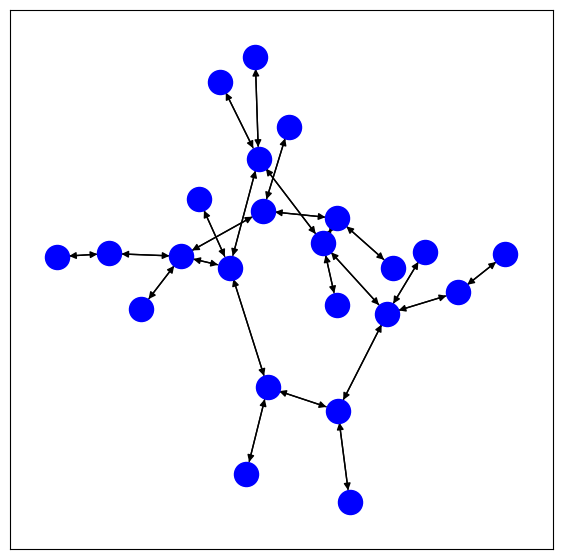

In [6]:
visualize_graph(tr_graphs[0], 'blue')

In [7]:
model.loader = model.get_input(tr_graphs)
model.test_loader = model.get_input(te_graphs)

<u/>**TRAIN THE MODEL**<u/>

_Now we train the model, for the number of epochs specified in the input parameters_

In [8]:
losses = model.train(model.loader)

  0%|▌                                                                                                                                                         | 1/300 [00:00<01:59,  2.50it/s]

epoch 0 | loss 0.36538273096084595


  4%|█████▌                                                                                                                                                   | 11/300 [00:03<01:39,  2.92it/s]

epoch 10 | loss 0.20315031707286835


  7%|██████████▋                                                                                                                                              | 21/300 [00:07<01:35,  2.93it/s]

epoch 20 | loss 0.2074865847826004


 10%|███████████████▊                                                                                                                                         | 31/300 [00:10<01:31,  2.94it/s]

epoch 30 | loss 0.17560677230358124


 14%|████████████████████▉                                                                                                                                    | 41/300 [00:14<01:28,  2.93it/s]

epoch 40 | loss 0.1692243218421936


 17%|██████████████████████████                                                                                                                               | 51/300 [00:17<01:24,  2.95it/s]

epoch 50 | loss 0.1380682736635208


 20%|███████████████████████████████                                                                                                                          | 61/300 [00:20<01:21,  2.94it/s]

epoch 60 | loss 0.1790657490491867


 24%|████████████████████████████████████▏                                                                                                                    | 71/300 [00:24<01:20,  2.83it/s]

epoch 70 | loss 0.14873924851417542


 27%|█████████████████████████████████████████▎                                                                                                               | 81/300 [00:27<01:15,  2.89it/s]

epoch 80 | loss 0.15540319681167603


 30%|██████████████████████████████████████████████▍                                                                                                          | 91/300 [00:31<01:11,  2.91it/s]

epoch 90 | loss 0.11856086552143097


 34%|███████████████████████████████████████████████████▏                                                                                                    | 101/300 [00:34<01:08,  2.92it/s]

epoch 100 | loss 0.11488145589828491


 37%|████████████████████████████████████████████████████████▏                                                                                               | 111/300 [00:38<01:04,  2.93it/s]

epoch 110 | loss 0.11987360566854477


 40%|█████████████████████████████████████████████████████████████▎                                                                                          | 121/300 [00:41<01:00,  2.94it/s]

epoch 120 | loss 0.1023784950375557


 44%|██████████████████████████████████████████████████████████████████▎                                                                                     | 131/300 [00:44<00:57,  2.94it/s]

epoch 130 | loss 0.13466371595859528


 47%|███████████████████████████████████████████████████████████████████████▍                                                                                | 141/300 [00:48<00:55,  2.86it/s]

epoch 140 | loss 0.10125894099473953


 50%|████████████████████████████████████████████████████████████████████████████▌                                                                           | 151/300 [00:52<00:56,  2.66it/s]

epoch 150 | loss 0.10820171982049942


 54%|█████████████████████████████████████████████████████████████████████████████████▌                                                                      | 161/300 [00:56<00:56,  2.48it/s]

epoch 160 | loss 0.107872374355793


 57%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 171/300 [00:59<00:46,  2.77it/s]

epoch 170 | loss 0.10445937514305115


 60%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 181/300 [01:03<00:42,  2.79it/s]

epoch 180 | loss 0.082571841776371


 64%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 191/300 [01:07<00:39,  2.76it/s]

epoch 190 | loss 0.0887359231710434


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 201/300 [01:10<00:35,  2.79it/s]

epoch 200 | loss 0.09006193280220032


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 211/300 [01:14<00:32,  2.78it/s]

epoch 210 | loss 0.1072210744023323


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 221/300 [01:18<00:28,  2.77it/s]

epoch 220 | loss 0.1081002727150917


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 231/300 [01:21<00:24,  2.78it/s]

epoch 230 | loss 0.1019507348537445


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 241/300 [01:25<00:22,  2.64it/s]

epoch 240 | loss 0.09211476147174835


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 251/300 [01:28<00:18,  2.69it/s]

epoch 250 | loss 0.13451822102069855


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 261/300 [01:32<00:14,  2.73it/s]

epoch 260 | loss 0.08197974413633347


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 271/300 [01:36<00:10,  2.83it/s]

epoch 270 | loss 0.10256459563970566


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 281/300 [01:40<00:06,  2.74it/s]

epoch 280 | loss 0.09358008950948715


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 291/300 [01:43<00:03,  2.68it/s]

epoch 290 | loss 0.08336829394102097


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [01:46<00:00,  2.80it/s]


_We can see the internal error decreases with more training_

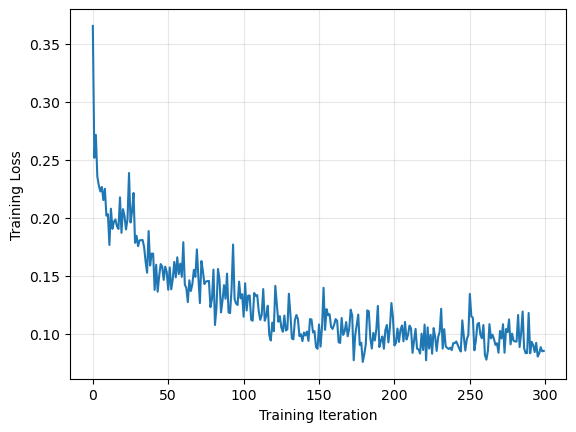

In [10]:
epochs = range(300)
fig = plt.figure()
fig.subplots_adjust()
ax1 = fig.add_subplot()
ax1.set_xlabel('Training Iteration')
ax1.set_ylabel('Training Loss')

plt.grid(alpha=0.3)
ax1.plot(epochs, losses)

<u/>**MAKE PREDICTIONS**<u/>

_Now make predictons on an external test set_

In [11]:
predicted_df=model.predict(model.test_loader, te_scl_dict, tr_scl_dict, te_ref_df)
predicted_df

,molecule_name,typestr,normalized_shift,normalized_prediction,shift,predicted_shift
0,TAJSOM,O,0.788296,1.135851,209.557703,286.969289
1,TAJSOM,O,1.048856,0.989147,262.307799,258.041934
2,TAJSOM,O,0.976708,1.012419,247.701502,262.630735
3,TAJSOM,C,-0.546656,-0.545756,72.027695,73.083014
4,TAJSOM,C,0.537629,0.522221,124.445140,126.091833
...,...,...,...,...,...,...
13262,FACZIU,H,-0.909538,-1.015118,1.629443,1.420471
13263,FACZIU,H,-0.971320,-1.014448,1.470193,1.422217
13264,FACZIU,C,-1.496514,-1.347804,26.108858,33.273551
13265,FACZIU,H,-0.919563,-0.737719,1.603601,2.143886


<u/>**EVALUATE THOSE PREDICTIONS**<u/>

In [12]:
def mae(x, y):
    return sum(abs(x-y))/len(x)

_Let's assess how well the model performs on this external testing set, mean absolute error is a good way of evaluating the prediction accuracy of a regression-based model_

In [13]:
h_df=predicted_df[predicted_df['typestr']=='H']
c_df=predicted_df[predicted_df['typestr']=='C']

In [14]:
h_df=predicted_df[predicted_df['typestr']=='H']
print(f"mean absolute error in PROTON chemical shift prediction: {mae(h_df['predicted_shift'], h_df['shift'])}")
print()
c_df=predicted_df[predicted_df['typestr']=='C']
print(f"mean absolute error in CARBON chemical shift prediction: {mae(c_df['predicted_shift'], c_df['shift'])}")

mean absolute error in PROTON chemical shift prediction: 0.5975179867820383

mean absolute error in CARBON chemical shift prediction: 9.129115217942111


_These errors are both approximately 5% of the respeective cehmical shift ranges. This is relatively high which is expected from the simplistic partially connected graph representation. For better results, the more sophisticated fully connected graph representation was delployed in NNConv._